In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import re

%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
pd.options.display.max_columns = None
pd.options.display.precision = 4

In [40]:
ls

log_error_mean.csv     zillow-anokas.py
properties_2016.csv    zillow_data_dictionary.xlsx
sample_submission.csv  zillow-eddie.ipynb
train_2016_v2.csv      zillow-submission-anokas.csv


In [41]:
train_2016 = pd.read_csv('train_2016_v2.csv', parse_dates=["transactiondate"])

In [42]:
properties_2016 = pd.read_csv('properties_2016.csv')

/home/applesauce/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
sample_sub = pd.read_csv('sample_submission.csv')

In [95]:
data_dict = pd.read_excel('zillow_data_dictionary.xlsx')

In [45]:
train_2016 = pd.merge(train_2016, properties_2016, on='parcelid', how='left')

In [46]:
sample_sub.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [47]:
train_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,3.4281e+07,-1.1849e+08,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.0371e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.0371e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,3.3668e+07,-1.1768e+08,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.0591e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,3.4136e+07,-1.1818e+08,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.0375e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.0375e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,3.3756e+07,-1.1831e+08,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.0373e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.0373e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,3.3486e+07,-1.1770e+08,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.0590e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.0590e+13


In [48]:
train_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

In [49]:
log_error_mean = train_2016['logerror'].mean()
log_error_mean

0.011457219606756682

In [50]:
train_2016.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.0275e+04,90275.0000,28781.0000,261.0000,43.0000,90275.0000,90275.0000,16.0,57364.0000,89093.0000,658.0,6856.000,89614.0000,85596.0000,33.0000,3564.0000,6856.0000,421.0000,90275.0000,9607.0000,89093.0000,29937.0000,29937.0000,56080.0000,9.0275e+04,9.0275e+04,8.0125e+04,17901.0,969.0000,1161.0,1204.0,16697.0,90275.0000,9.0275e+04,88472.0000,90275.0000,36012.0000,90240.0000,90275.0000,43.0,12009.0000,299.0000,58353.0000,2646.0000,95.0000,89519.0000,20570.0000,8.9895e+04,9.0274e+04,90275.0,9.0274e+04,90269.0000,1783.0000,8.9670e+04
mean,1.2985e+07,0.0115,1.8164,7.2299,713.5814,2.2795,3.0319,4.0,5.5654,2.3092,66.0,1347.974,1773.1860,1745.4545,1404.5455,2380.0901,1355.5467,2302.5463,6048.8706,1.1879,2.2412,1.8120,345.5212,3.9270,3.4005e+07,-1.1820e+08,2.9110e+04,1.0,519.8277,1.0,1.0,1.0,261.8322,6.0492e+07,33761.3329,2525.4208,190646.5402,96586.1312,1.4785,7.0,1.0087,6.0100,1.1104,310.1421,311.6947,1968.5329,1.4407,1.8009e+05,4.5767e+05,2015.0,2.7834e+05,5983.9759,13.4027,6.0492e+13
std,2.5045e+06,0.1611,2.9742,2.7162,437.4342,1.0043,1.1564,0.0,1.9006,0.9762,0.0,652.399,928.1624,909.9412,110.1082,1068.2072,673.7035,1346.2552,20.6635,0.4842,0.9631,0.6088,267.0159,3.6844,2.6497e+05,3.6060e+05,1.2172e+05,0.0,155.0542,0.0,0.0,0.0,5.1829,2.0505e+05,46672.3939,805.6948,166228.9106,3661.3391,2.8196,0.0,0.1008,0.4372,0.7972,216.7219,346.3549,23.7635,0.5445,2.0913e+05,5.5488e+05,0.0,4.0050e+05,6838.8770,2.7160,2.0466e+11
min,1.0712e+07,-4.6050,1.0000,2.0000,100.0000,0.0000,0.0000,4.0,1.0000,1.0000,66.0,44.000,2.0000,2.0000,1056.0000,560.0000,44.0000,257.0000,6037.0000,1.0000,1.0000,0.0000,0.0000,1.0000,3.3339e+07,-1.1945e+08,1.6700e+02,1.0,28.0000,1.0,1.0,1.0,31.0000,6.0371e+07,3491.0000,1286.0000,6952.0000,95982.0000,0.0000,7.0,1.0000,4.0000,1.0000,25.0000,18.0000,1885.0000,1.0000,1.0000e+02,2.2000e+01,2015.0,2.2000e+01,49.0800,6.0000,6.0371e+13
25%,1.1560e+07,-0.0253,1.0000,7.0000,407.5000,2.0000,2.0000,4.0,4.0000,2.0000,66.0,938.000,1184.0000,1172.0000,1392.0000,1648.0000,938.0000,1112.0000,6037.0000,1.0000,2.0000,2.0000,0.0000,2.0000,3.3812e+07,-1.1841e+08,5.7030e+03,1.0,420.0000,1.0,1.0,1.0,261.0000,6.0373e+07,12447.0000,1286.0000,46736.0000,96193.0000,0.0000,7.0,1.0000,6.0000,1.0000,180.0000,100.0000,1953.0000,1.0000,8.1245e+04,1.9902e+05,2015.0,8.2228e+04,2872.8300,13.0000,6.0373e+13
50%,1.2547e+07,0.0060,1.0000,7.0000,616.0000,2.0000,3.0000,4.0,7.0000,2.0000,66.0,1244.000,1540.0000,1518.0000,1440.0000,2104.5000,1248.0000,2028.0000,6037.0000,1.0000,2.0000,2.0000,433.0000,2.0000,3.4022e+07,-1.1817e+08,7.2000e+03,1.0,500.0000,1.0,1.0,1.0,261.0000,6.0376e+07,25218.0000,3101.0000,118887.0000,96393.0000,0.0000,7.0,1.0000,6.0000,1.0000,259.5000,159.0000,1970.0000,1.0000,1.3200e+05,3.4287e+05,2015.0,1.9297e+05,4542.7500,14.0000,6.0376e+13
75%,1.4228e+07,0.0392,1.0000,7.0000,872.0000,3.0000,4.0000,4.0,7.0000,3.0000,66.0,1614.000,2095.0000,2056.0000,1440.0000,2862.0000,1619.0000,3431.0000,6059.0000,1.0000,3.0000,2.0000,484.0000,7.0000,3.4173e+07,-1.1792e+08,1.1686e+04,1.0,600.0000,1.0,1.0,1.0,266.0000,6.0590e+07,45457.0000,3101.0000,274800.0000,96987.0000,0.0000,7.0,1.0000,6

In [96]:
data_dict['Notes'] = ''
data_dict.set_index('Feature', inplace=True)
abc = pd.Series(data_dict.index)
data_dict.index = abc.str.replace("'",'')
data_dict

,Description,Notes
Feature,,
airconditioningtypeid,Type of cooling system present in the home (i...,
architecturalstyletypeid,"Architectural style of the home (i.e. ranch, ...",
basementsqft,Finished living area below or partially below...,
bathroomcnt,Number of bathrooms in home including fractio...,
bedroomcnt,Number of bedrooms in home,
buildingqualitytypeid,Overall assessment of condition of the buildi...,
buildingclasstypeid,"The building framing type (steel frame, wood f...",
calculatedbathnbr,Number of bathrooms in home including fractio...,
decktypeid,Type of deck (if any) present on parcel,


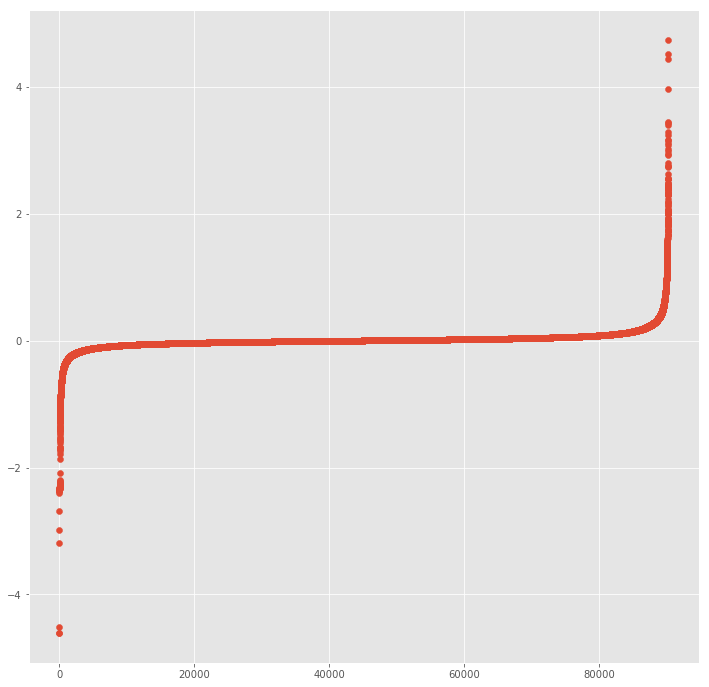

In [52]:
plt.scatter(range(train_2016.shape[0]), np.sort(train_2016.logerror.values))

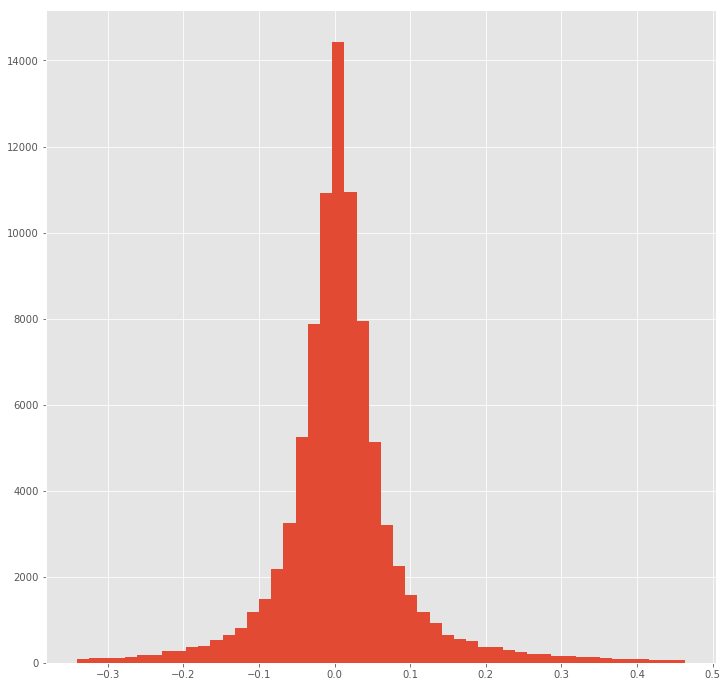

In [53]:
ulimit = np.percentile(train_2016.logerror.values, 99)
llimit = np.percentile(train_2016.logerror.values, 1)
train_2016[(train_2016['logerror']<ulimit) & (train_2016['logerror']>llimit)]['logerror'].hist(bins=50)

In [54]:
train_2016['transactionmonth']=train_2016['transactiondate'].dt.month

In [55]:
train_2016['transactionmonth'].value_counts().sort_index()

1      6556
2      6333
3      8652
4      9311
5      9961
6     10922
7      9947
8     10476
9      9575
10     4977
11     1826
12     1739
Name: transactionmonth, dtype: int64

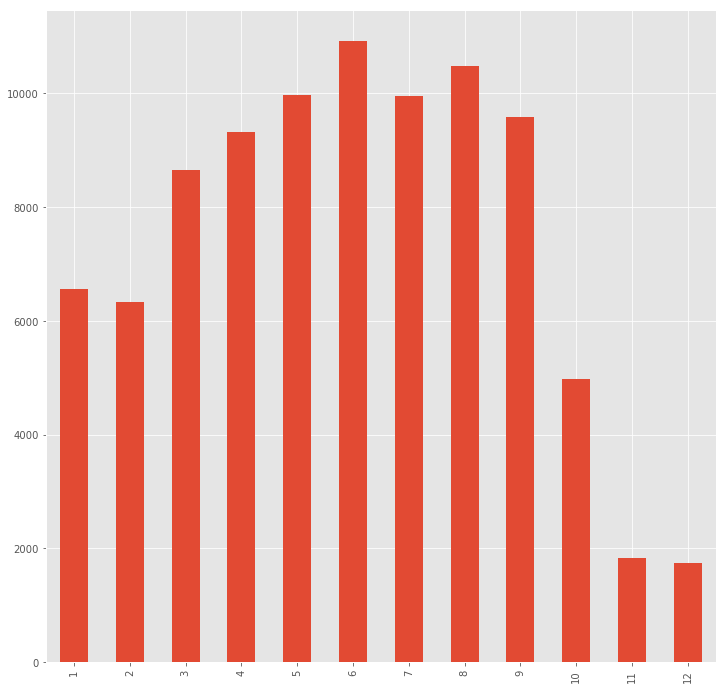

In [56]:
train_2016['transactionmonth'].value_counts().sort_index().plot.bar()

In [57]:
(train_2016['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [59]:
(train_2016.count() / max(train_2016.count()) * 100).sort_values(ascending=False)

transactionmonth                100.0000
roomcnt                         100.0000
logerror                        100.0000
transactiondate                 100.0000
bathroomcnt                     100.0000
bedroomcnt                      100.0000
fips                            100.0000
latitude                        100.0000
longitude                       100.0000
propertylandusetypeid           100.0000
rawcensustractandblock          100.0000
regionidcounty                  100.0000
parcelid                        100.0000
assessmentyear                  100.0000
taxvaluedollarcnt                99.9989
landtaxvaluedollarcnt            99.9989
propertycountylandusecode        99.9989
taxamount                        99.9934
regionidzip                      99.9612
structuretaxvaluedollarcnt       99.5791
censustractandblock              99.3298
calculatedfinishedsquarefeet     99.2678
yearbuilt                        99.1626
calculatedbathnbr                98.6907
fullbathcnt     

In [98]:
train_2016.corr('pearson')['logerror'].sort_values(ascending=False) # {‘pearson’, ‘kendall’, ‘spearman’}

logerror                        1.0000
basementsqft                    0.2534
yardbuildingsqft26              0.0862
finishedsquarefeet12            0.0419
calculatedfinishedsquarefeet    0.0388
finishedsquarefeet6             0.0368
finishedsquarefeet13            0.0347
threequarterbathnbr             0.0341
fireplacecnt                    0.0332
calculatedbathnbr               0.0294
fullbathcnt                     0.0288
bathroomcnt                     0.0279
garagecarcnt                    0.0265
finishedfloor1squarefeet        0.0262
bedroomcnt                      0.0255
garagetotalsqft                 0.0239
finishedsquarefeet50            0.0236
structuretaxvaluedollarcnt      0.0221
finishedsquarefeet15            0.0193
yearbuilt                       0.0173
numberofstories                 0.0131
censustractandblock             0.0089
rawcensustractandblock          0.0084
fips                            0.0084
taxvaluedollarcnt               0.0065
transactionmonth         

In [99]:
train_2016.corr('kendall')['logerror'].sort_values(ascending=False) 

/home/applesauce/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3577: RuntimeWarning: invalid value encountered in double_scalars
  size * (size - 1) * (size - 2))


logerror                        1.0000
finishedsquarefeet12            0.0537
calculatedbathnbr               0.0512
bathroomcnt                     0.0509
calculatedfinishedsquarefeet    0.0507
fullbathcnt                     0.0475
basementsqft                    0.0445
numberofstories                 0.0444
fireplacecnt                    0.0406
architecturalstyletypeid        0.0359
bedroomcnt                      0.0316
yearbuilt                       0.0308
finishedsquarefeet15            0.0262
garagecarcnt                    0.0244
structuretaxvaluedollarcnt      0.0241
taxvaluedollarcnt               0.0225
garagetotalsqft                 0.0199
fips                            0.0194
transactionmonth                0.0190
parcelid                        0.0185
poolsizesum                     0.0164
landtaxvaluedollarcnt           0.0154
threequarterbathnbr             0.0144
roomcnt                         0.0130
regionidzip                     0.0128
lotsizesquarefeet        

In [100]:
train_2016.corr('spearman')['logerror'].sort_values(ascending=False) 

logerror                        1.0000
basementsqft                    0.0986
finishedsquarefeet12            0.0786
calculatedfinishedsquarefeet    0.0744
calculatedbathnbr               0.0671
bathroomcnt                     0.0667
fullbathcnt                     0.0610
numberofstories                 0.0546
fireplacecnt                    0.0501
architecturalstyletypeid        0.0446
yearbuilt                       0.0445
bedroomcnt                      0.0417
finishedsquarefeet15            0.0397
structuretaxvaluedollarcnt      0.0344
taxvaluedollarcnt               0.0316
garagecarcnt                    0.0302
garagetotalsqft                 0.0284
parcelid                        0.0275
transactionmonth                0.0268
fips                            0.0244
poolsizesum                     0.0240
landtaxvaluedollarcnt           0.0219
regionidzip                     0.0194
threequarterbathnbr             0.0176
lotsizesquarefeet               0.0173
roomcnt                  

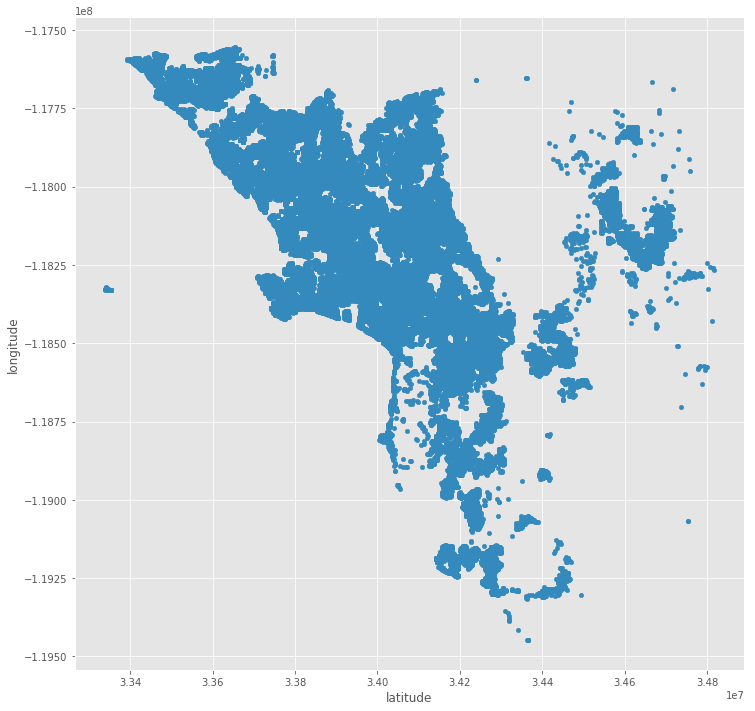

In [61]:
train_2016.plot.scatter('latitude', 'longitude')

In [63]:
train_2016.dtypes.value_counts()

float64           53
object             5
int64              2
datetime64[ns]     1
dtype: int64

In [122]:
train_2016.shape

(90275, 61)

In [126]:
y_train = train_2016['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
x_train = train_2016.drop(['parcelid', 'logerror', 'transactiondate', 'transactionmonth']+cat_cols, axis=1)
feat_names = train_2016.columns.values

split = 80000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

In [161]:
import xgboost as xgb
xgb_params = {
    'objective': 'reg:linear',
    'silent': 1,
    'eval_metric': 'mae'
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(xgb_params, dtrain, 5000, watchlist, verbose_eval=100)

[0]	train-mae:0.354362	valid-mae:0.347486
[100]	train-mae:0.06387	valid-mae:0.062035
[200]	train-mae:0.060158	valid-mae:0.058668
[300]	train-mae:0.056816	valid-mae:0.055628
[400]	train-mae:0.053995	valid-mae:0.053077
[500]	train-mae:0.051401	valid-mae:0.050664
[600]	train-mae:0.049055	valid-mae:0.048448
[700]	train-mae:0.046761	valid-mae:0.046309
[800]	train-mae:0.044613	valid-mae:0.044242
[900]	train-mae:0.042821	valid-mae:0.042427
[1000]	train-mae:0.04096	valid-mae:0.040595
[1100]	train-mae:0.03918	valid-mae:0.038827
[1200]	train-mae:0.037572	valid-mae:0.037301
[1300]	train-mae:0.036076	valid-mae:0.035726
[1400]	train-mae:0.034629	valid-mae:0.034218
[1500]	train-mae:0.033323	valid-mae:0.032856
[1600]	train-mae:0.031961	valid-mae:0.03145
[1700]	train-mae:0.030826	valid-mae:0.030399
[1800]	train-mae:0.02957	valid-mae:0.029205
[1900]	train-mae:0.028378	valid-mae:0.028042
[2000]	train-mae:0.027318	valid-mae:0.026941
[2100]	train-mae:0.026296	valid-mae:0.025957
[2200]	train-mae:0.025516	v

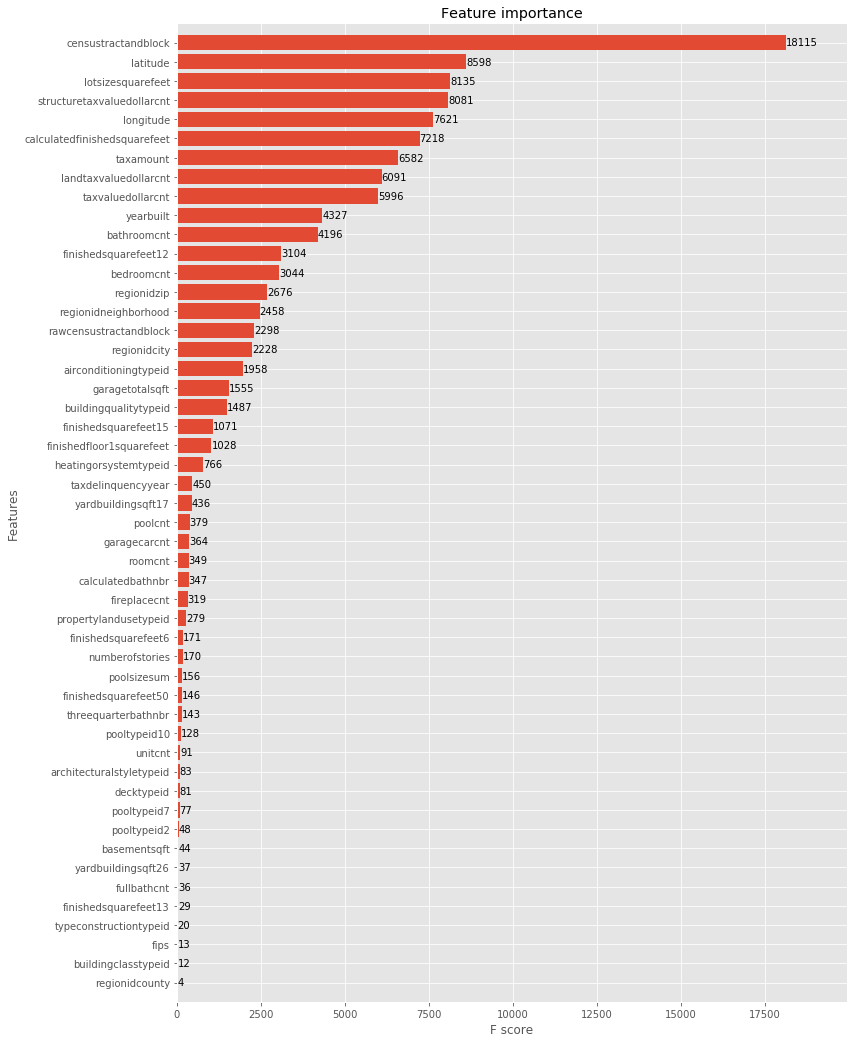

In [162]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [163]:
sample_sub['parcelid'] = sample_sub['ParcelId']
df_test = sample_sub.merge(properties_2016, on='parcelid', how='left')

In [164]:
for i in np.array(df_test.columns):
    if i in np.array(cat_cols):
        print(i)

hashottuborspa
propertycountylandusecode
propertyzoningdesc
fireplaceflag
taxdelinquencyflag


In [165]:
x_test = df_test.drop(['parcelid', '201610', '201611', '201612', '201711', '201612', "hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"], axis=1)

In [166]:
x_test.drop(['201710', '201712'], axis=1, inplace=True)
x_test

,ParcelId,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4144e+07,-1.1865e+08,85768.0,NaN,NaN,NaN,NaN,NaN,269.0,6.0378e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4140e+07,-1.1863e+08,4083.0,NaN,NaN,NaN,NaN,NaN,261.0,6.0378e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.3989e+07,-1.1839e+08,63085.0,NaN,NaN,NaN,NaN,NaN,47.0,6.0377e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4149e+07,-1.1844e+08,7521.0,NaN,NaN,NaN,NaN,NaN,47.0,6.0371e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4194e+07,-1.1839e+08,8512.0,NaN,NaN,NaN,NaN,NaN,31.0,6.0371e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,NaN,2400.0,NaN,NaN,2400.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4172e+07,-1.1838e+08,2500.0,NaN,NaN,NaN,NaN,NaN,31.0,6.0371e+07,12447.0,3101.0,46795.0,96446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1943.0,1.0,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4132e+07,-1.1835e+08,NaN,NaN,NaN,NaN,NaN,NaN,260.0,6.0371e+07,12447.0,3101.0,274049.0,96049.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3611.0,NaN,NaN,3611.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4171e+07,-1.1831e+08,5333.0,NaN,NaN,NaN,NaN,NaN,31.0,6.0373e+07,396054.0,3101.0,NaN,96434.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1946.0,1.0,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4218e+07,-1.1833e+08,145865.0,NaN,NaN,NaN,NaN,NaN,269.0,6.0373e+07,396054.0,3101.0,NaN,96436.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,3754.0,NaN,NaN,3754.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,3.4290e+07,-1.1843e+08,7494.0,NaN,NaN,NaN,NaN,NaN,31.0,6.0373e+07,47547.0,3101.0,NaN,96366.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1978.0,1.0,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN


In [167]:
x_test.drop('ParcelId', axis=1, inplace=True)

In [168]:
d_test = xgb.DMatrix(x_test)
p_test = model.predict(d_test)

In [169]:
sub = pd.read_csv('sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = p_test

In [170]:
sub.to_csv('xgb_v3.csv', index=False, float_format='%.4f')

In [159]:
# for col in sample_sub.columns[1:]:
#     sample_sub[col] = log_error_mean
# sample_sub.to_csv('log_error_mean.csv', index=False, float_format='%.4f')

In [160]:
# sample_sub.head()